In [ ]:
#import libraries and dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

#import csv file into pandas dataframe
bitcoin = pd.read_csv('/content/coin_Bitcoin.csv')
bitcoin

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


<ipython-input-51-862a1a7d6874>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bitcoin.corr())


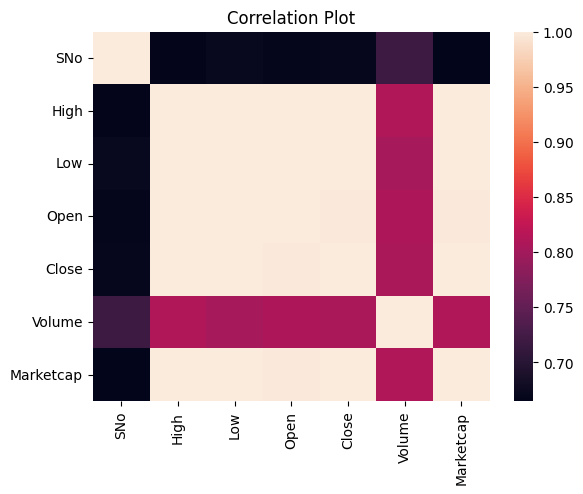

In [ ]:
#Generate correlation matrix
sns.heatmap(bitcoin.corr())
plt.title('Correlation Plot')
plt.show()

In [ ]:
#features in our dataset
bitcoin.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

In [ ]:
#how much data we have
bitcoin.shape

(2991, 10)

In [ ]:
#what types of data do we have
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [ ]:
#do we have any missing value
bitcoin.isnull().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [ ]:
#dropping categories in our x values
#selling our y value to open price of bitcoin
x = bitcoin.drop(['SNo',	'Name',	'Symbol',	'Date', 'Marketcap'], axis = 1)
y = bitcoin['Marketcap']

In [ ]:
x

,High,Low,Open,Close,Volume
0,147.488007,134.000000,134.444000,144.539993,0.000000e+00
1,146.929993,134.050003,144.000000,139.000000,0.000000e+00
2,139.889999,107.720001,139.000000,116.989998,0.000000e+00
3,125.599998,92.281898,116.379997,105.209999,0.000000e+00
4,108.127998,79.099998,106.250000,97.750000,0.000000e+00
...,...,...,...,...,...
2986,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10
2987,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10
2988,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10
2989,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10


In [ ]:
#labels
#splitting our data into training and test sets ratio 70/30
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 2)

In [ ]:
#create the model and fit (train) on the training data
from sklearn.linear_model import LinearRegression

#load the linear regression model
LR = LinearRegression()

LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
#make predictions on the test data
#model evaluation - testing the model on the test data
y_pred = LR.predict(x_test)

In [ ]:
#calculating the coefficients
coefficients = LR.coef_
print(f'Coefficients: {coefficients}')

Coefficients: [-1.16306427e+06  9.83751689e+05  3.91484543e+05  1.84329322e+07
  6.70630559e-02]


In [ ]:
#Calculating the intercept
intercept = LR.intercept_
print(f'Intercept: {intercept}')

Intercept: -4479753190.561249


In [ ]:
#Calculate the r^2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (f'R2: {r2}')

R2: 0.9994111514413794


In [ ]:
#Calculating the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print (f'Mean Squared Error: {mse}')

Mean Squared Error: 2.7385360232705815e+19


In [ ]:
#Calculating Root Mean Square Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'RMSE: {rmse}')

RMSE: 5233102352.59218


In [ ]:
#Calculating the Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

MAE: 3562059265.414167


In [ ]:
y_pred

array([ 3.61741576e+09,  1.89435526e+11,  4.65967641e+07,  1.25913279e+11,
        4.07797044e+09,  5.60606570e+07, -2.41835496e+08,  1.69869507e+11,
        1.90607280e+11,  3.40028504e+11,  1.18269480e+11,  1.18261431e+11,
        2.67759284e+11,  1.17933039e+10,  1.55258201e+10,  6.40648845e+10,
        9.91393745e+11,  1.94357538e+11,  1.69487680e+11,  2.26394317e+09,
        3.68734139e+09,  1.06850634e+12,  2.72913429e+09,  2.11097595e+11,
       -1.00596995e+07,  1.49052281e+11, -2.38951686e+09,  3.54700914e+11,
        8.35275044e+08, -2.03131436e+09,  9.60177797e+09,  1.81610109e+11,
        1.72431688e+11,  2.75968637e+09,  1.10384588e+10,  2.98313464e+09,
        1.11570549e+10, -2.06538840e+09,  2.01958999e+11,  3.51839574e+09,
        4.25919456e+10,  7.77016048e+09,  1.54014721e+11, -6.20690513e+08,
        3.54913353e+11,  1.63057175e+11,  1.20653763e+11,  2.79997595e+09,
       -2.50270376e+09,  2.08591025e+11,  3.29917549e+09,  1.20939119e+11,
        8.20113100e+09,  

In [ ]:
#export the model as pickle
import pickle
with open('bitcoin_price_prediction.pkl', 'wb') as f:
  pickle.dump(LR, f)